In [2]:
import json
import pprint
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
patient = 507
source_type = 'validate'
image_size = 176

In [6]:
filepath = "/masvol/output/dsb/volume/1/1combined_1_1_176_dice_aug_drop_32B_cr"
filename = "{0}/{1}_{2}_{3}_CR.json".format(filepath,source_type,patient,image_size)

In [7]:
filename

'/masvol/output/dsb/volume/1/1combined_1_1_176_dice_aug_drop_32B_cr/validate_507_176_CR.json'

In [8]:
jin = None
with open(filename, 'r') as inputs:
    jin = json.load(inputs)
    #print (jin, type(jin))

#### maxSL = max slice location
#### minSL = min slice location
#### zmax = max ones count
#### zmin = min ones count
#### We were counting zeroes so the z letter stuck to be part of the variable name.  But the counts are for ones from the predictions
#### Some don't have any prediction so you see zmax 0 or zmin 0 with maxSL = None and zmaxframe = ''

In [141]:
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(jin)

{   'sax_11': {   'maxSL': -1.2787160450612163,
                  'maxST': 8.0,
                  'minSL': -1.2787160450612163,
                  'minST': 8.0,
                  'zcounts': [   345,
                                 264,
                                 227,
                                 151,
                                 885,
                                 1409,
                                 0,
                                 687,
                                 214,
                                 1150,
                                 90,
                                 1202,
                                 1546,
                                 653,
                                 1067,
                                 0,
                                 1701,
                                 67,
                                 0,
                                 1544,
                                 396,
                                 0,
       

In [10]:
dcmarraypath = "/masvol/output/dsb/volume/1/1combined_1_1_176_dice_aug_drop_32B_cr"
dcmfilepath = "{0}/{1}/{2}".format(dcmarraypath,source_type,patient)

In [11]:
#!ls $dcmfilepath/sax_56_IM-6380-0009.dcm.npy
dcmfilepath

'/masvol/output/dsb/volume/1/1combined_1_1_176_dice_aug_drop_32B_cr/validate/507'

In [12]:
def apply_sort(jin):
    sldict = dict()
    
    for sax in jin:
        maxsl = jin[sax]['maxSL']
        minsl = jin[sax]['minSL']
        slkey = None
        
        if minsl is not None:
            slkey = minsl
        elif maxsl is None:
            continue
        else:
            slkey = maxsl
                
        sldict.update({slkey:sax})
    
    slarray = []
    
    for sl in reversed(sorted(sldict)):
        slarray.append((sl,sldict[sl]))
    
    return slarray

### Sorted by slice location

In [13]:
sjin = apply_sort(jin)
sjin

[(-3.80374553441591, 'sax_5'),
 (-13.803743630485556, 'sax_6'),
 (-23.80374319698288, 'sax_7'),
 (-33.80374385281223, 'sax_8'),
 (-43.80374221540879, 'sax_9'),
 (-53.80374516449038, 'sax_10'),
 (-63.8037435270808, 'sax_11'),
 (-73.80374541006073, 'sax_12'),
 (-83.80374483875661, 'sax_13'),
 (-93.80374672173103, 'sax_14'),
 (-103.80374615042695, 'sax_15')]

In [14]:
image_path = "/masvol/output/dsb/norm/1/1/unet_model_validate/data/dsb_{0}_image_path.txt".format(patient)
#print(image_path)
image_array = []

with open (image_path, 'r') as filepath:
    for i in filepath:
        i = i.strip()
        image_array = [x.replace("{0}/{1}/{2}/".format(dcmarraypath,source_type,patient),"") 
                       for x in i.split(',')]

### Showing the original dicom end-systolic and end-diastolic images identified in each slice

Min /masvol/output/dsb/norm/1/1/validate/507/sax_5_IM-6142-0012.dcm.npy
Min /masvol/output/dsb/norm/1/1/validate/507/sax_6_IM-6143-0006.dcm.npy
Min /masvol/output/dsb/norm/1/1/validate/507/sax_7_IM-6144-0016.dcm.npy
Min /masvol/output/dsb/norm/1/1/validate/507/sax_8_IM-6145-0009.dcm.npy
Min /masvol/output/dsb/norm/1/1/validate/507/sax_9_IM-6146-0017.dcm.npy
Min /masvol/output/dsb/norm/1/1/validate/507/sax_10_IM-6147-0017.dcm.npy
Min /masvol/output/dsb/norm/1/1/validate/507/sax_11_IM-6148-0017.dcm.npy
Min /masvol/output/dsb/norm/1/1/validate/507/sax_12_IM-6149-0018.dcm.npy
Min /masvol/output/dsb/norm/1/1/validate/507/sax_13_IM-6150-0013.dcm.npy
Min /masvol/output/dsb/norm/1/1/validate/507/sax_14_IM-6151-0019.dcm.npy
Min /masvol/output/dsb/norm/1/1/validate/507/sax_15_IM-6152-0015.dcm.npy


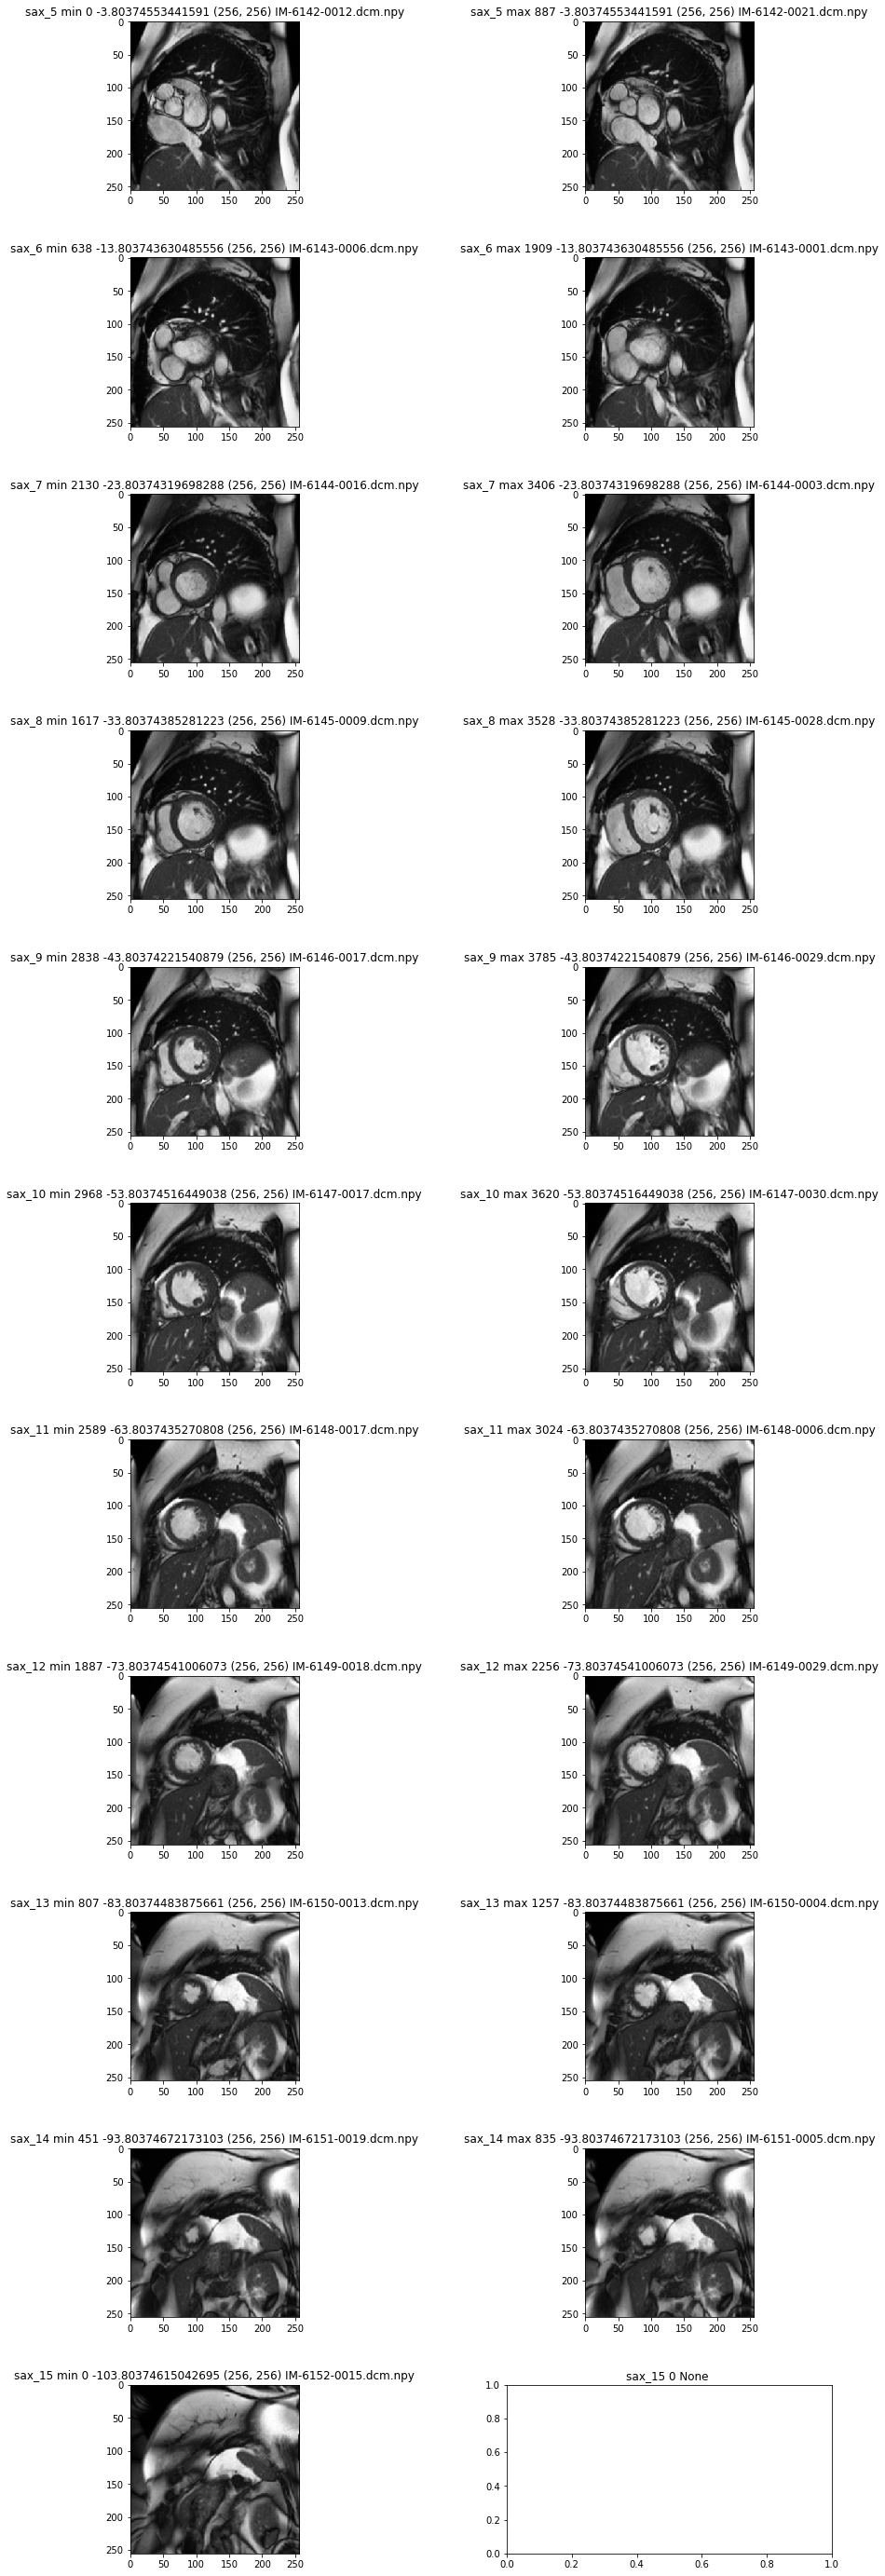

In [23]:
rowcount = len(jin.keys())
display_list = []

scount = 0

fig = plt.figure(figsize=(15,50))
fig.subplots_adjust(hspace=0.4, wspace=0.4);

for sl, sax in sjin:
    maxsl = jin[sax]['maxSL']
    minsl = jin[sax]['minSL']
    minones = jin[sax]['zmin']
    maxones = jin[sax]['zmax']
    minframe = jin[sax]['zminframe']
    maxframe = jin[sax]['zmaxframe']
    dcmfilemin = "/masvol/output/dsb/norm/1/1/validate/{0}/{1}_{2}".format(patient,sax,minframe)
    print('Min',dcmfilemin)
    dcmfilemax = "/masvol/output/dsb/norm/1/1/validate/{0}/{1}_{2}".format(patient,sax,maxframe)
    #print('Max',dcmfilemax)
    minimg = []
    maximg = []
    scount += 1
    tempfile = "/masvol/output/dsb/norm/1/1/validate/{0}/{1}_{2}".format(patient,sax, minframe)
    #print(tempfile)
    #print(image_array)
    if tempfile in image_array:
        display_list.append((image_array.index(tempfile),minones))
    #print(len(display_list))
    tempfile = "{0}_{1}".format(sax, maxframe)
    
    if tempfile in image_array:
        display_list.append((image_array.index(tempfile),maxones))
    #print(dcmfilemin)
    if os.path.isfile(dcmfilemin):
        minimg = np.load(dcmfilemin)
        #print(minimg)

    if os.path.isfile(dcmfilemax):
        maximg = np.load(dcmfilemax)

    ax = fig.add_subplot(rowcount, 2, scount)
    
    try:
        title1 = "{0} min {1} {2} {3} {4}".format(sax,minones,minsl,minimg.shape, minframe)
        ax.imshow(minimg, cmap = 'gray')
    except:
        title1 = "{0} {1} {2} {3}".format(sax,minones,minsl,minframe)
        
    ax.set_title(title1)
    scount += 1
    
    ax = fig.add_subplot(rowcount, 2, scount)
    
    try:
        title2 = "{0} max {1} {2} {3} {4}".format(sax,maxones,maxsl,maximg.shape, maxframe)
        ax.imshow(maximg, cmap = 'gray')
    except:  
        title2 = "{0} {1} {2} {3}".format(sax,maxones,maxsl,maxframe)
        
    ax.set_title(title2)
    
plt.show()

In [25]:
filepath = "/masvol/output/dsb/norm/1/1/unet_model_validate/combined_1_1_176_dice_aug_drop_32B_predict_CR/dsb_{1}_{2}_CR".format(source_type,patient,image_size)
!ls $filepath*

/masvol/output/dsb/norm/1/1/unet_model_validate/combined_1_1_176_dice_aug_drop_32B_predict_CR/dsb_507_176_CR_pred_round.npy
/masvol/output/dsb/norm/1/1/unet_model_validate/combined_1_1_176_dice_aug_drop_32B_predict_CR/dsb_507_176_CR_predictions.npy
/masvol/output/dsb/norm/1/1/unet_model_validate/combined_1_1_176_dice_aug_drop_32B_predict_CR/dsb_507_176_CR_predictions_cleaned.npy
/masvol/output/dsb/norm/1/1/unet_model_validate/combined_1_1_176_dice_aug_drop_32B_predict_CR/dsb_507_176_CR_ts_norm.npy


In [26]:
ts = np.load("{0}_ts_norm.npy".format(filepath))

In [30]:
print("{0}_ts_norm.npy".format(filepath))

/masvol/output/dsb/norm/1/1/unet_model_validate/combined_1_1_176_dice_aug_drop_32B_predict_CR/dsb_507_176_CR_ts_norm.npy


In [27]:
predictions = np.load("{0}_predictions.npy".format(filepath))
print("{0}_predictions.npy".format(filepath))
pred2 = np.load("{0}_pred_round.npy".format(filepath))
pred_clean=np.load("{0}_predictions_cleaned.npy".format(filepath))
print("{0}_predictions_cleaned.npy".format(filepath))
samples, x, y, z = predictions.shape


/masvol/output/dsb/norm/1/1/unet_model_validate/combined_1_1_176_dice_aug_drop_32B_predict_CR/dsb_507_176_CR_predictions.npy
/masvol/output/dsb/norm/1/1/unet_model_validate/combined_1_1_176_dice_aug_drop_32B_predict_CR/dsb_507_176_CR_predictions_cleaned.npy


In [28]:
display_list

[(174, 0),
 (6, 638),
 (75, 2130),
 (115, 1617),
 (207, 2838),
 (92, 2968),
 (90, 2589),
 (80, 1887),
 (88, 807),
 (319, 451),
 (204, 0)]

### Showing the corresponding end-systolic and end-diastolic predicted images 

/masvol/output/dsb/norm/1/1/validate/507/sax_5_IM-6142-0012.dcm.npy
0


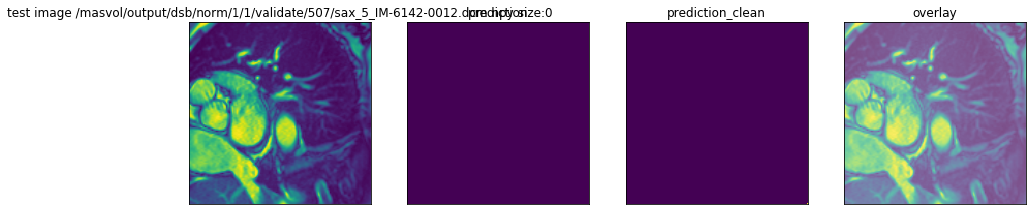

/masvol/output/dsb/norm/1/1/validate/507/sax_6_IM-6143-0006.dcm.npy
638


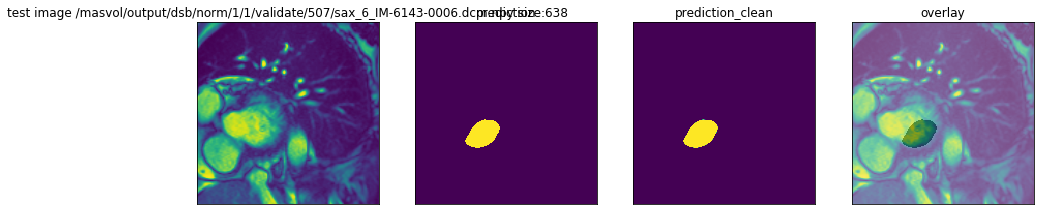

/masvol/output/dsb/norm/1/1/validate/507/sax_7_IM-6144-0016.dcm.npy
2130


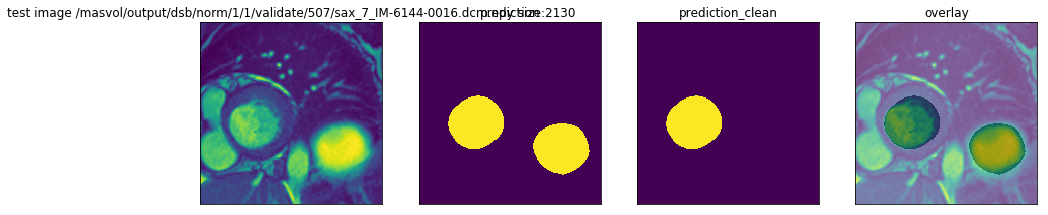

/masvol/output/dsb/norm/1/1/validate/507/sax_8_IM-6145-0009.dcm.npy
1617


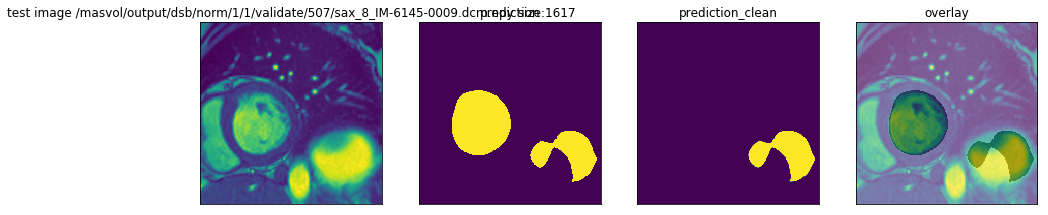

/masvol/output/dsb/norm/1/1/validate/507/sax_9_IM-6146-0017.dcm.npy
2838


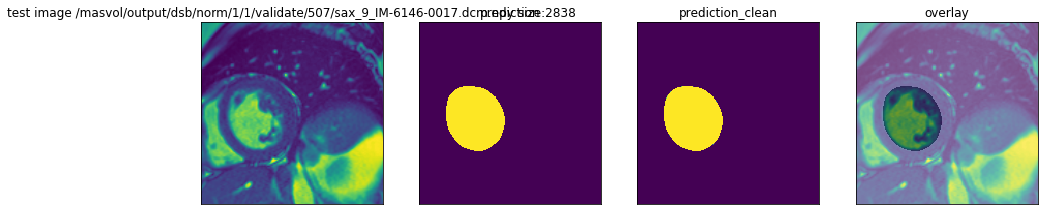

/masvol/output/dsb/norm/1/1/validate/507/sax_10_IM-6147-0017.dcm.npy
2968


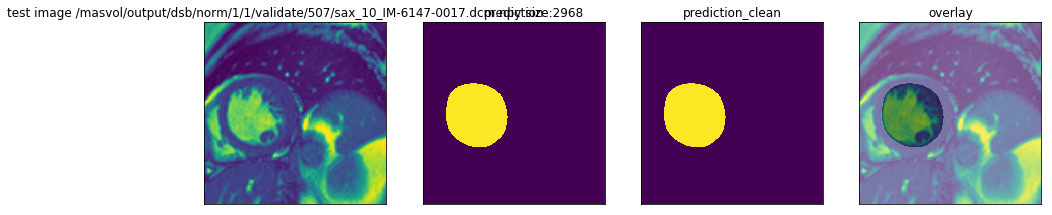

/masvol/output/dsb/norm/1/1/validate/507/sax_11_IM-6148-0017.dcm.npy
2589


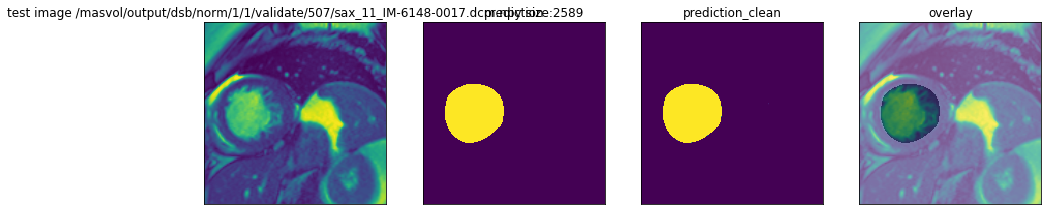

/masvol/output/dsb/norm/1/1/validate/507/sax_12_IM-6149-0018.dcm.npy
1887


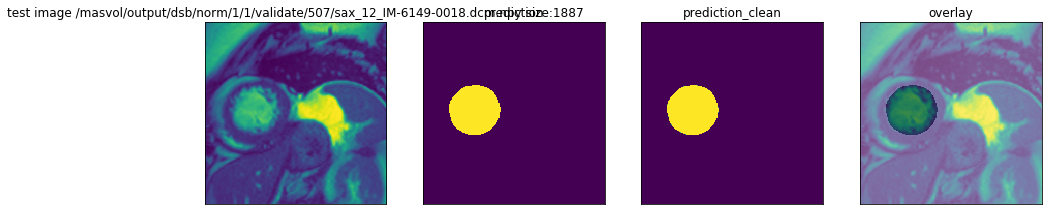

/masvol/output/dsb/norm/1/1/validate/507/sax_13_IM-6150-0013.dcm.npy
807


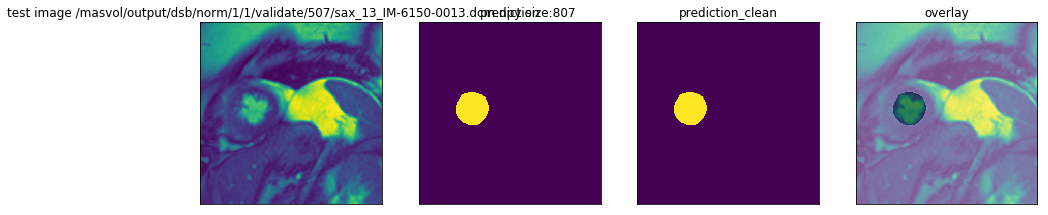

/masvol/output/dsb/norm/1/1/validate/507/sax_14_IM-6151-0019.dcm.npy
451


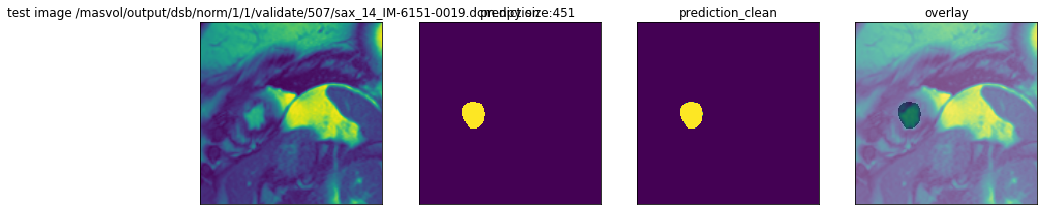

/masvol/output/dsb/norm/1/1/validate/507/sax_15_IM-6152-0015.dcm.npy
0


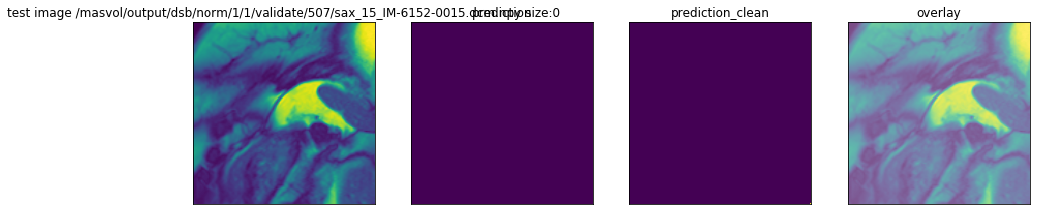

In [32]:
for i,ones in display_list:
    print(image_array[i])
    print(ones)
    f, axs = plt.subplots(1,3,figsize=(15,15))
    plt.subplot(141),plt.imshow(ts[i].reshape(x, y))
    plt.title('test image {0} size:{1}'.format(image_array[i],ones))
    plt.xticks([]), plt.yticks([])
    
    plt.subplot(142),plt.imshow(pred2[i].reshape(x, y))
    plt.title('prediction'), plt.xticks([]), plt.yticks([])

    plt.subplot(143),plt.imshow(pred_clean[i].reshape(x, y))
    plt.title('prediction_clean'), plt.xticks([]), plt.yticks([])
    plt.subplot(144),plt.imshow(ts[i].reshape(x, y)), 
    plt.imshow(pred2[i].reshape(x, y), 'binary', interpolation='none', alpha=0.3)
    plt.title('overlay'), plt.xticks([]), plt.yticks([])
    plt.show()

In [ ]:
file_pred='/masvol/output/dsb/norm/1/1/unet_model_validate/combined_1_1_176_dice_aug_drop_32B_predict_CR/dsb_504_176_CR_predictions.npy'
file_clean='/masvol/output/dsb/norm/1/1/unet_model_validate/combined_1_1_176_dice_aug_drop_32B_predict_CR/dsb_507_176_CR_predictions_cleaned.npy''